# Canny Edge Detector


1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/圖片路徑')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


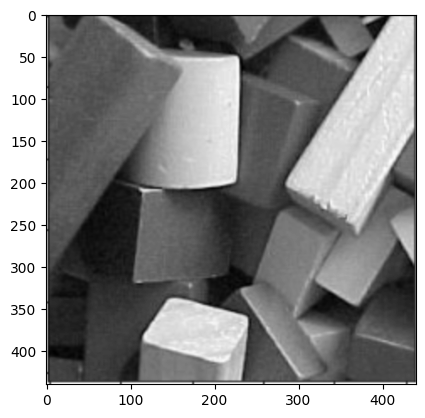

image.shape:  (440, 440)


In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)


## Step 1. Gaussian filter

original shape:  (440, 440)
gaussian shape:  (440, 440)


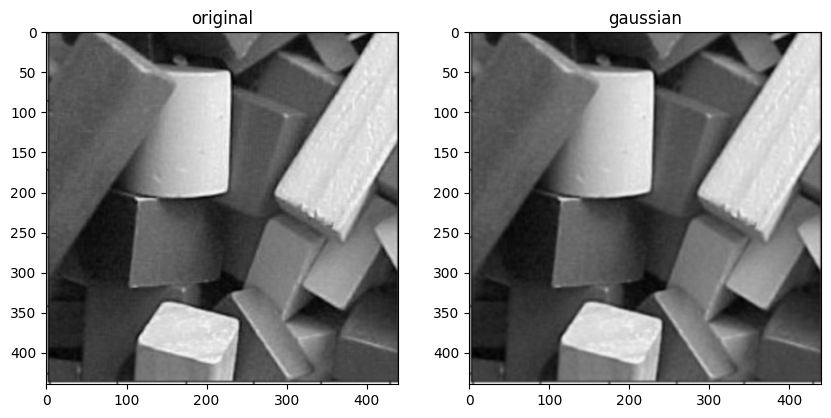

In [9]:
# Canny 邊緣檢測
# 1. 噪聲過濾：使用高斯濾波器進行平滑處理，以減少噪聲的影響。
# 2. 計算梯度：找到圖像中的邊緣
# 3. 非極大值抑制：在梯度方向上，對圖像進行遍歷，將局部最大值（即邊緣）保留，其他像素值設為0。
# 4. 雙閾值檢測：通過設定兩個閾值，將非極大值中的強邊緣和弱邊緣區分開來。
# 5. 邊緣追蹤：根據強邊緣的位置，追踪和連接其周圍的弱邊緣，形成完整的邊緣。


def padding_img(img,k_size,style='edge'): # 對圖像進行填充
  # ------------ To do ------------- #

  # ---------------------------------- #
def gaussian_kernel(size):
  # ------------ To do ------------- #

  # ---------------------------------- #
KernelSize = 3

def Gaussian_Filter(KernelSize,image):
    row,col =image.shape
    Gaussian_Kernel = gaussian_kernel(KernelSize)

    resx=np.zeros((row,col),np.uint8)
    padimg = padding_img(image,(KernelSize-1)//2,style='edge')

    # ------------ To do ------------- #

    # ---------------------------------- #

# 印出 original shape,gaussian shape
# 輸出 original,gaussian 兩張圖

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [ ]:
def sobel(img, filtering_type):
    h, w = img.shape

    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


    Gx = np.zeros((h - 2, w - 2))
    Gy = np.zeros((h - 2, w - 2))

    # ------------ To do ------------- #

     # 計算水平和垂直方向的梯度
     # 計算梯度大小及角度
     # 回傳梯度大小(output)和角度(angle)

    # ---------------------------------- #

    return output, angle


def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j


gaussian shape:  (440, 440)
Horizontal Sobel filter shape:  (440, 440)
Vertical Sobel filter shape:  (440, 440)
Gradient amplitude shape:  (440, 440)


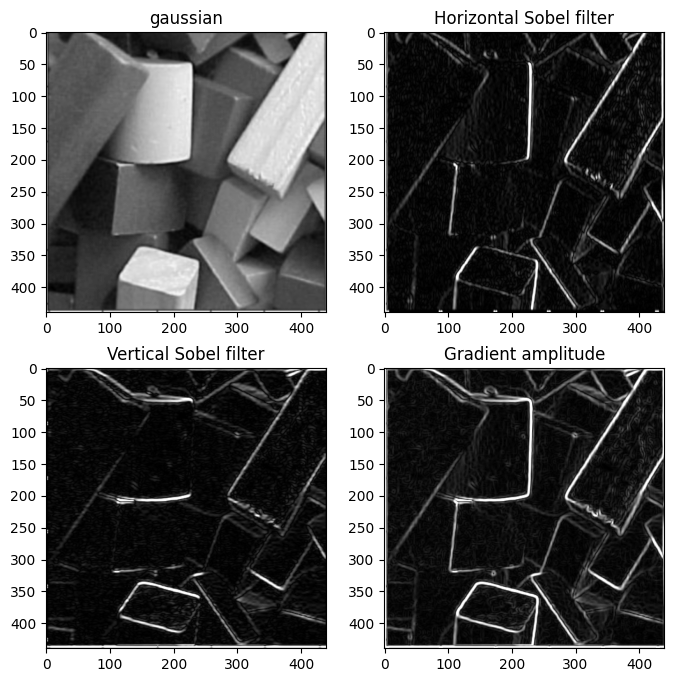

In [ ]:
# ------------ To do ------------- #
# 印出 gaussian shape,Horizontal Sobel filter shape,Vertical Sobel filter shape,Gradient amplitude shape
# 輸出四張圖

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [ ]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width= gradient.shape
    for j in range(1, height-1):
        for i in range(1, width-1):

            # ------------ To do ------------- #

             #將每個 pixel 依序當作中心 pixel 並由其梯度角度判斷該與哪個方向的相鄰 pixel 比較梯度大小(ex.梯度方向為 -22.5° 到 22.5°皆視為0°，並與水平左右相鄰 pixel 比較)
             #若中心 pixel 比較後非最大值則中心 pixel 梯度值設為0(此 pixel 視為非邊緣)，比較後為最大值則不改變其梯度值

            # ---------------------------------- #

    return gradient_copy

gradient,angle = sobel(img, 'magnitude')
After_non_maximum_supression = non_maximum_suppression(gradient,angle)
print(After_non_maximum_supression)

[[255.         255.         165.06137903 ... 255.         217.83935246
   55.86365892]
 [255.         255.           0.         ...   0.         255.
  216.78802488]
 [255.           0.           0.         ... 255.         255.
  255.        ]
 ...
 [255.         255.         255.         ...   0.           0.
  207.94308771]
 [255.         255.         255.         ...   0.           0.
  255.        ]
 [255.         255.         255.         ... 255.         255.
  255.        ]]


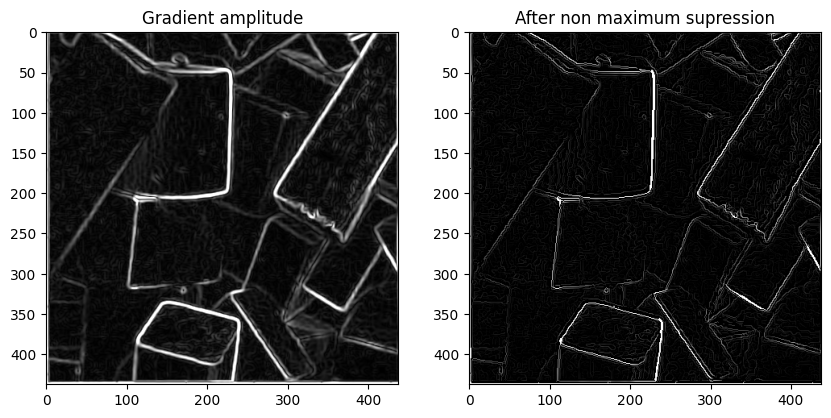

In [ ]:
# ------------ To do -------------


## Step 4. Thresholding edges

In [ ]:
def seperate(img, minimum, maximum):
    # ------------ To do ------------- #

     #避免直接修改輸入的圖像，創建一個圖像的副本
     #判斷圖像中的每個像素的梯度大小(分為強邊緣、弱邊緣及非邊緣並分別設值)
     #回傳處理後的圖像

    # ---------------------------------- #

thresholding = seperate(After_non_maximum_supression, minimum = 50, maximum = 100)

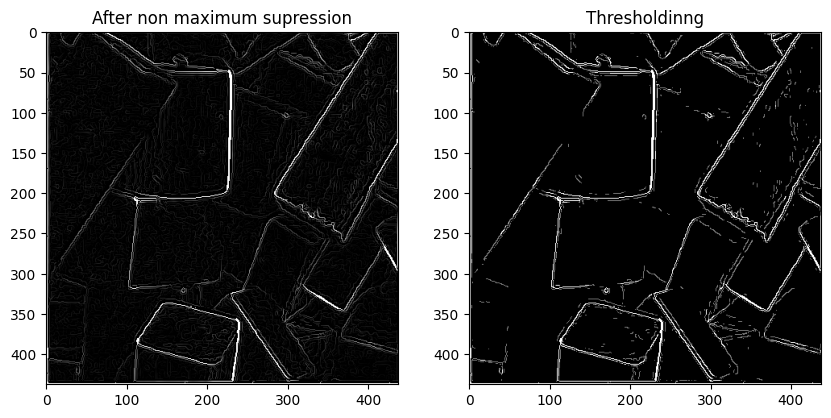

In [ ]:
# ------------ To do ------------- #


## Step 5. Hysteresis

In [ ]:
def Connect(img,weak):
  # ------------ To do ------------- #

    # 判斷該像素的值為'weak'，則檢查其周圍3*3區域
    # 若此區域中的最大值大於 weak，表示若邊緣像素連接到周圍的強邊緣
    # 則該像素視為邊緣
    # 若此區域中的最大值不大於 weak 則不保留此弱邊緣像素
    # 回傳經過弱邊緣連接處理後的圖像

   # ---------------------------------- #

dst_img = Connect(thresholding,weak=50)


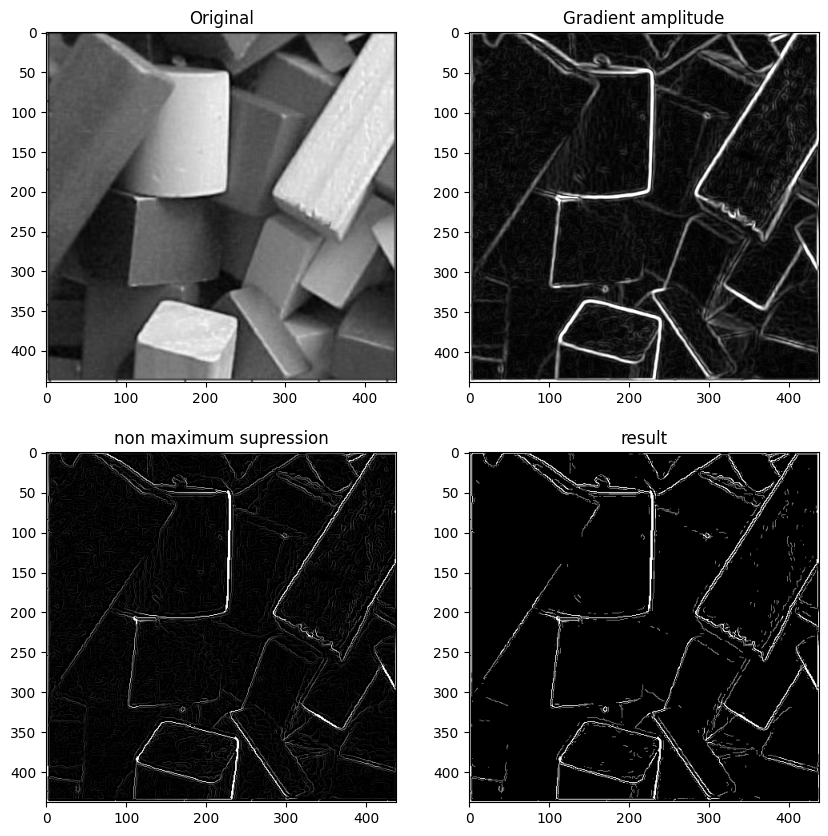

In [ ]:
# ------------ To do ------------- #


## Canny Edge OpenCV 套件


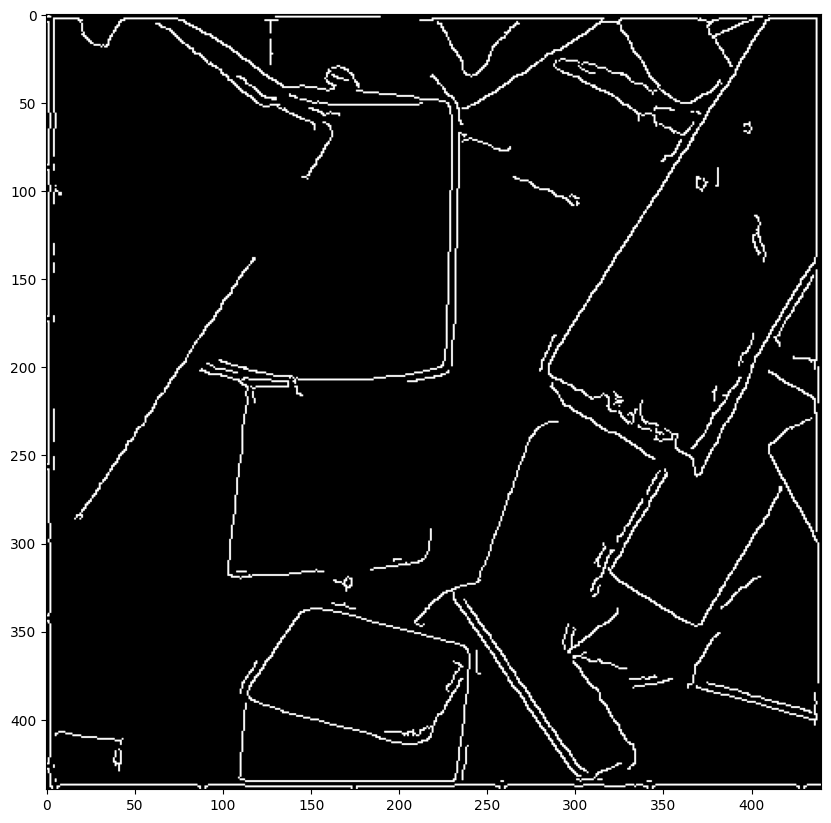

In [ ]:
low_threshold = 50
high_threshold = 100
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

## 加分討論：為什麼和套件不一樣？

因為...

# 加分題 : Dilation (膨脹) & Erosion (侵蝕)

## Dilation (膨脹)

In [ ]:
def Dilation(img, kernel):
  row, col = img.shape
  dilation_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  padimg = padding_img(img, (kernelsize-1)//2)

  # -------- To do ------------- #

  # ------------------------------- #
  return dilation_img

res = Dilation(img, get_kernel('dilation', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', img.shape)
print('dilation shape: ', res.shape)

## Erosion (侵蝕)

In [ ]:
def Erosion(img, kernel):
  row, col = img.shape
  erosion_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2)

  # -------- To do ------------- #

  # ------------------------------- #
  return erosion_img

res = Erosion(img, get_kernel('erosion', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', img.shape)
print('erosion shape: ', res.shape)